In [1]:
# SETUP

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 8.
Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

Let's use the Iris dataset: the Iris Setosa and Iris Versicolor classes are linearly separable.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

# 'target_names': array(['setosa', 'versicolor', 'virginica']
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Let's train LinearSVC, SVC and SGDClassifier:

In [3]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# setting hyperparameters
C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss = 'hinge', C = C)
svm_clf = SVC(kernel = 'linear', C = C)
sgd_clf = SGDClassifier(loss = 'hinge', learning_rate = 'constant', 
                        eta0 = 0.001, alpha = alpha, 
                        max_iter = 1000, tol = 1e-3)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf.fit(X_scaled, y)
svm_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print("LinearSVC:    ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:          ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier:", sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:     [0.28475098] [[1.05364854 1.09903804]]
SVC:           [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier: [0.118] [[0.77647131 0.73001593]]


Let's plot the decision boundaries of these three models:

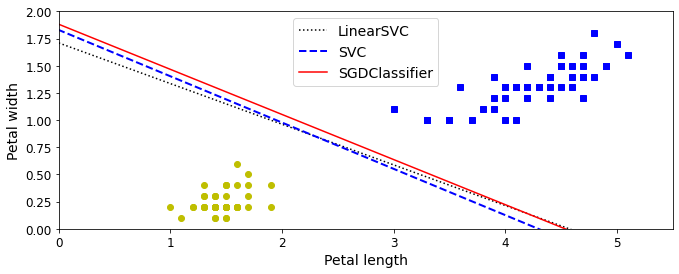

In [4]:
# Compute the slope and bias of each decision boundary
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]

w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]

w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

### 9.
Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [5]:
# get MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1)
mnist.keys()

X, y = mnist["data"], mnist["target"].astype(np.uint8)

# separate into training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
lin_clf = LinearSVC()
lin_clf.fit(X_train, y_train)

/Users/bruno/Desktop/hands-on-ML_studies-diary/my_env/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

Let's make predictions on the training set and measure the accuracy (we don't want to measure it on the test set yet, since we have not selected and trained the final model yet):

In [7]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8403333333333334

Okay, this accuracy on MNIST is pretty bad. This linear model is certainly too simple for MNIST, but perhaps we just needed to scale the data first:

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

Now, let's see how it performg on a scaled set:

In [9]:
lin_clf = LinearSVC(random_state = 42) # I'm setting this to 42 so I can check my output with the book's solution
lin_clf.fit(X_train_scaled, y_train)

/Users/bruno/Desktop/hands-on-ML_studies-diary/my_env/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=42)

In [10]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9217333333333333

That's much better (we cut the error rate by about 25%), but still not great at all for MNIST. If we want to use an SVM, we will have to use a kernel. Let's try an SVC with an RBF kernel (the default).

In [11]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [12]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

That's promising, we get better performance even though we trained the model on 6 times less data. Let's tune the hyperparameters by doing a randomized search with cross validation. We will do this on a small dataset just to speed up the process:

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3, n_jobs = -1)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.8s finished


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1253b5f10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1253b5910>},
                   verbose=2)

In [34]:
rnd_search_cv.best_estimator_

SVC(C=5.275410183585496, gamma=0.0011241862095793058)

In [35]:
rnd_search_cv.best_score_

0.8659947372522222

This looks pretty low but remember we only trained the model on 1,000 instances. Let's retrain the best estimator on the whole training set.

NOTE: run this at night, it will take hours!!! Tip: use "n_jobs = -1" to use all processor cores available on your machine and speed this up (already declared on RandomizedSearchCV( ) above).

In [36]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=5.275410183585496, gamma=0.0011241862095793058)

In [37]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9966166666666667

Ah, this looks good! Let's select this model. Now we can test it on the test set:

In [38]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9727

Not too bad, but apparently the model is overfitting slightly. It's tempting to tweak the hyperparameters a bit more (e.g. decreasing C and/or gamma), but we would run the risk of overfitting the test set. Other people have found that the hyperparameters C=5 and gamma=0.005 yield even better performance (over 98% accuracy). By running the randomized search for longer and on a larger part of the training set, you may be able to find this as well.

### 10.
Train an SVM regressor on the California housing dataset.

In [39]:
# get the data
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [40]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# training a LinearSVR
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42, max_iter=10000)
lin_svr.fit(X_train_scaled, y_train)

LinearSVR(max_iter=10000, random_state=42)

In [46]:
# check how it performs
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9595484665813285

In [47]:
# check RMSE:
np.sqrt(mse)

0.979565447829459

In this training set, the targets are tens of thousands of dollars. The RMSE gives a rough idea of the kind of error you should expect (with a higher weight for large errors): so with this model we can expect errors somewhere around $10,000. Not great. Let's see if we can do better with an RBF Kernel. We will use randomized search with cross validation to find the appropriate hyperparameter values for C and gamma:

In [48]:
from sklearn.svm import SVR

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, 
                                   verbose=2, cv=3, random_state=42, n_jobs = -1)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.5s finished


RandomizedSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x128ed6dd0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1254dd190>},
                   random_state=42, verbose=2)

In [49]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

Now let's measure the RMSE on the training set:

In [50]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785359

Looks much better than the linear model. Let's select this model and evaluate it on the test set:

In [51]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5929168385528734